## Use UpSet plots to visualize significant results from the different analysis sets

[based on example from UpSet API](https://upsetplot.readthedocs.io/en/stable/auto_examples/plot_discrete.html#sphx-glr-auto-examples-plot-discrete-py)

In [1]:
! date

Thu Jul 14 16:03:43 UTC 2022


#### import libraries

In [2]:
from pandas import read_csv, DataFrame
from numpy import where
import matplotlib.pyplot as plt
from upsetplot import generate_counts, plot, UpSet
from matplotlib import cm
from matplotlib.pyplot import rc_context

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# for white background of figures (only for docs rendering)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

#### set notebook variables

In [3]:
# parameters
cohort = 'aging'
assay = 'RNA'

# directories
wrk_dir = '/home/jupyter/aging'
results_dir = f'{wrk_dir}/results'

# in files
results_file = f'{results_dir}/aging.glmmtmb_age_diffs_fdr.csv'

# variables
DEBUG = True

### load the input data

In [4]:
df = read_csv(results_file)
print(f'shape of input data {df.shape}')
if DEBUG:
    display(df.head())

shape of input data (28548, 9)


,feature,intercept,estimate,std.error,statistic,p.value,tissue,type,fdr_bh
0,LINC02593,-6.588815,-1.979733,0.640648,-3.090203,0.002000,Middle temporal gyrus,brain_region,0.031302
1,ISG15,-2.851665,-0.478886,0.168812,-2.836799,0.004557,Middle temporal gyrus,brain_region,0.048795
2,MEGF6,-3.358775,0.310553,0.095130,3.264499,0.001097,Middle temporal gyrus,brain_region,0.022328
3,EPHA8,-4.230609,0.914316,0.303745,3.010140,0.002611,Middle temporal gyrus,brain_region,0.036201
4,ASAP3,-1.604814,0.322646,0.087524,3.686370,0.000227,Middle temporal gyrus,brain_region,0.008847


### format Brain Region results using "set" approach and plot

In [5]:
#subset dataframe
ec_degs = df[df.eval("tissue.str.startswith('Entorhinal').values")]
mtg_degs = df[df.eval("tissue.str.startswith('Middle').values")]
put_degs = df[df.eval("tissue.str.startswith('Putamen').values")]
svz_degs = df[df.eval("tissue.str.startswith('Subventricular').values")]

#convert to list
ec_degs_list = ec_degs["feature"].tolist()
mtg_degs_list = mtg_degs["feature"].tolist()
put_degs_list = put_degs["feature"].tolist()
svz_degs_list = svz_degs["feature"].tolist()

#convert to set
ec = set(ec_degs_list)
mtg = set(mtg_degs_list)
put = set(put_degs_list)
svg = set(svz_degs_list)

In [6]:
set_names = ['EC', 'MTG', 'PUT', 'SVG']
all_elems = ec.union(mtg).union(put).union(svg)
brainregion_df = DataFrame([[e in ec, e in mtg, e in put, e in svg] for e in all_elems], columns = set_names)
df_up = brainregion_df.groupby(set_names).size()


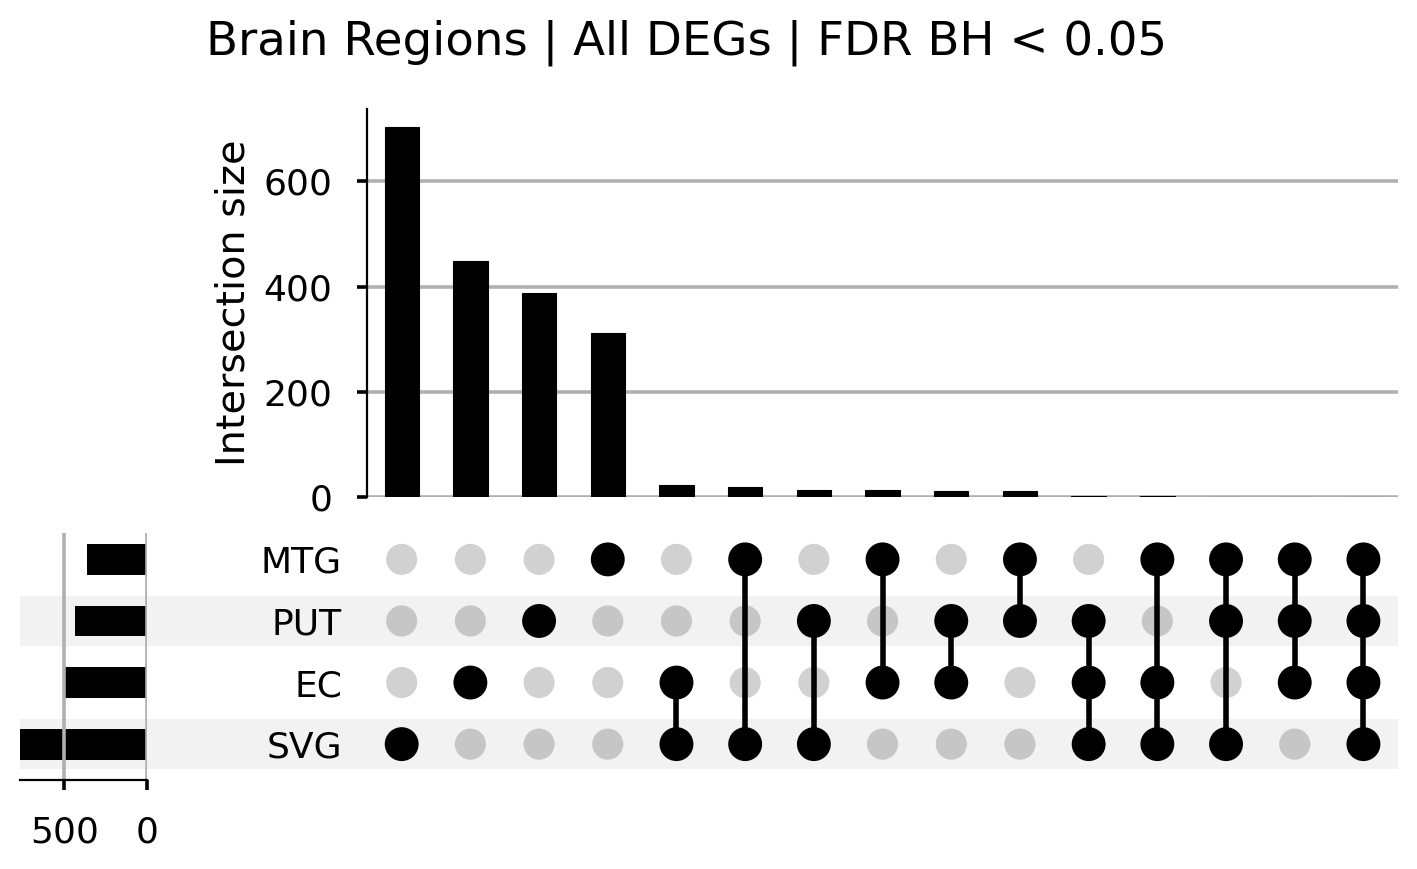

In [7]:
with rc_context({'figure.figsize': (9, 6), 'figure.dpi': 100, 'font.size': 14}):
    plt.style.use('seaborn-talk')
    plot(df_up, sort_by='cardinality')

    title1 = "Brain Regions |"
    title2= " All DEGs | FDR BH < 0.05"
    plt.suptitle(title1 + title2)
    plt.show()    

In [8]:
print(df_up.shape)
if DEBUG:
    display(df_up.head())

(15,)


EC     MTG    PUT    SVG  
False  False  False  True     702
              True   False    387
                     True      15
       True   False  False    311
                     True      19
dtype: int64

### format Brain Region results using "dataframe multi-index" approach and plot

#### create brain region abbreviations

In [9]:
df.loc[df.tissue == 'Entorhinal cortex','tissue_abr'] = 'EC'
df.loc[df.tissue == 'Middle temporal gyrus','tissue_abr'] = 'MTG'
df.loc[df.tissue == 'Putamen','tissue_abr'] = 'PUT'
df.loc[df.tissue == 'Subventricular zone','tissue_abr'] = 'SZ'
df.tissue_abr.value_counts()

SZ     767
EC     508
PUT    433
MTG    363
Name: tissue_abr, dtype: int64

In [10]:
if DEBUG:
    display(df.head())

,feature,intercept,estimate,std.error,statistic,p.value,tissue,type,fdr_bh,tissue_abr
0,LINC02593,-6.588815,-1.979733,0.640648,-3.090203,0.002000,Middle temporal gyrus,brain_region,0.031302,MTG
1,ISG15,-2.851665,-0.478886,0.168812,-2.836799,0.004557,Middle temporal gyrus,brain_region,0.048795,MTG
2,MEGF6,-3.358775,0.310553,0.095130,3.264499,0.001097,Middle temporal gyrus,brain_region,0.022328,MTG
3,EPHA8,-4.230609,0.914316,0.303745,3.010140,0.002611,Middle temporal gyrus,brain_region,0.036201,MTG
4,ASAP3,-1.604814,0.322646,0.087524,3.686370,0.000227,Middle temporal gyrus,brain_region,0.008847,MTG


### add direction of effect annotation for plotting

In [11]:
df['direction'] = where(df.estimate > 0, 'Increased', 'Decreased')
print(f'shape of data {df.shape}')

if DEBUG:
    display(df.head())

shape of data (28548, 11)


,feature,intercept,estimate,std.error,statistic,p.value,tissue,type,fdr_bh,tissue_abr,direction
0,LINC02593,-6.588815,-1.979733,0.640648,-3.090203,0.002000,Middle temporal gyrus,brain_region,0.031302,MTG,Decreased
1,ISG15,-2.851665,-0.478886,0.168812,-2.836799,0.004557,Middle temporal gyrus,brain_region,0.048795,MTG,Decreased
2,MEGF6,-3.358775,0.310553,0.095130,3.264499,0.001097,Middle temporal gyrus,brain_region,0.022328,MTG,Increased
3,EPHA8,-4.230609,0.914316,0.303745,3.010140,0.002611,Middle temporal gyrus,brain_region,0.036201,MTG,Increased
4,ASAP3,-1.604814,0.322646,0.087524,3.686370,0.000227,Middle temporal gyrus,brain_region,0.008847,MTG,Increased


#### format the multi-index for use with UpSet

In [12]:
# add binary column per region to use for mutli-index
regions_df = df.loc[df.type == 'brain_region'].copy()
for region in regions_df.tissue_abr.unique():
    regions_df[region] = False
    region_genes = list(regions_df.loc[(regions_df.tissue_abr == region) & 
                                       (regions_df.fdr_bh <= 0.05)].feature.unique())
    regions_df.loc[regions_df.feature.isin(region_genes), region] = True
print(regions_df.shape)

# create the multi-index
regions_df = regions_df.set_index(regions_df.EC == True)
regions_df = regions_df.set_index(regions_df.PUT == True, append=True)
regions_df = regions_df.set_index(regions_df.MTG == True, append=True)
regions_df = regions_df.set_index(regions_df.SZ == True, append=True)
print(regions_df.shape)
if DEBUG:
    display(regions_df.head())

(2071, 15)
(2071, 15)


feature  intercept  estimate  std.error  statistic  \
EC    PUT   MTG  SZ                                                            
False False True False  LINC02593  -6.588815 -1.979733   0.640648  -3.090203   
                 False      ISG15  -2.851665 -0.478886   0.168812  -2.836799   
                 False      MEGF6  -3.358775  0.310553   0.095130   3.264499   
                 False      EPHA8  -4.230609  0.914316   0.303745   3.010140   
                 False      ASAP3  -1.604814  0.322646   0.087524   3.686370   

                         p.value                 tissue          type  \
EC    PUT   MTG  SZ                                                     
False False True False  0.002000  Middle temporal gyrus  brain_region   
                 False  0.004557  Middle temporal gyrus  brain_region   
                 False  0.001097  Middle temporal gyrus  brain_region   
                 False  0.002611  Middle temporal gyrus  brain_region   
                 False  0.000227  Middle temporal gyrus  brain_region   

                          fdr_bh tissue_abr  direction   MTG    PUT     EC  \
EC    PUT   MTG  SZ                                                          
False False True False  0.031302        MTG  Decreased  True  False  False   
                 False  0.048795        MTG  Decreased  True  False  False   
                 False  0.022328        MTG  Increased  True  False  False   
                 False  0.036201        MTG  Increased  True  False  False   
                 False  0.008847        MTG  Increased  True  False  False   

                           SZ  
EC    PUT   MTG  SZ            
False False True False  False  
                 False  False  
                 False  False  
                 False  False  
                 False  False

#### plot the stacked bar-chart based on discrete variable

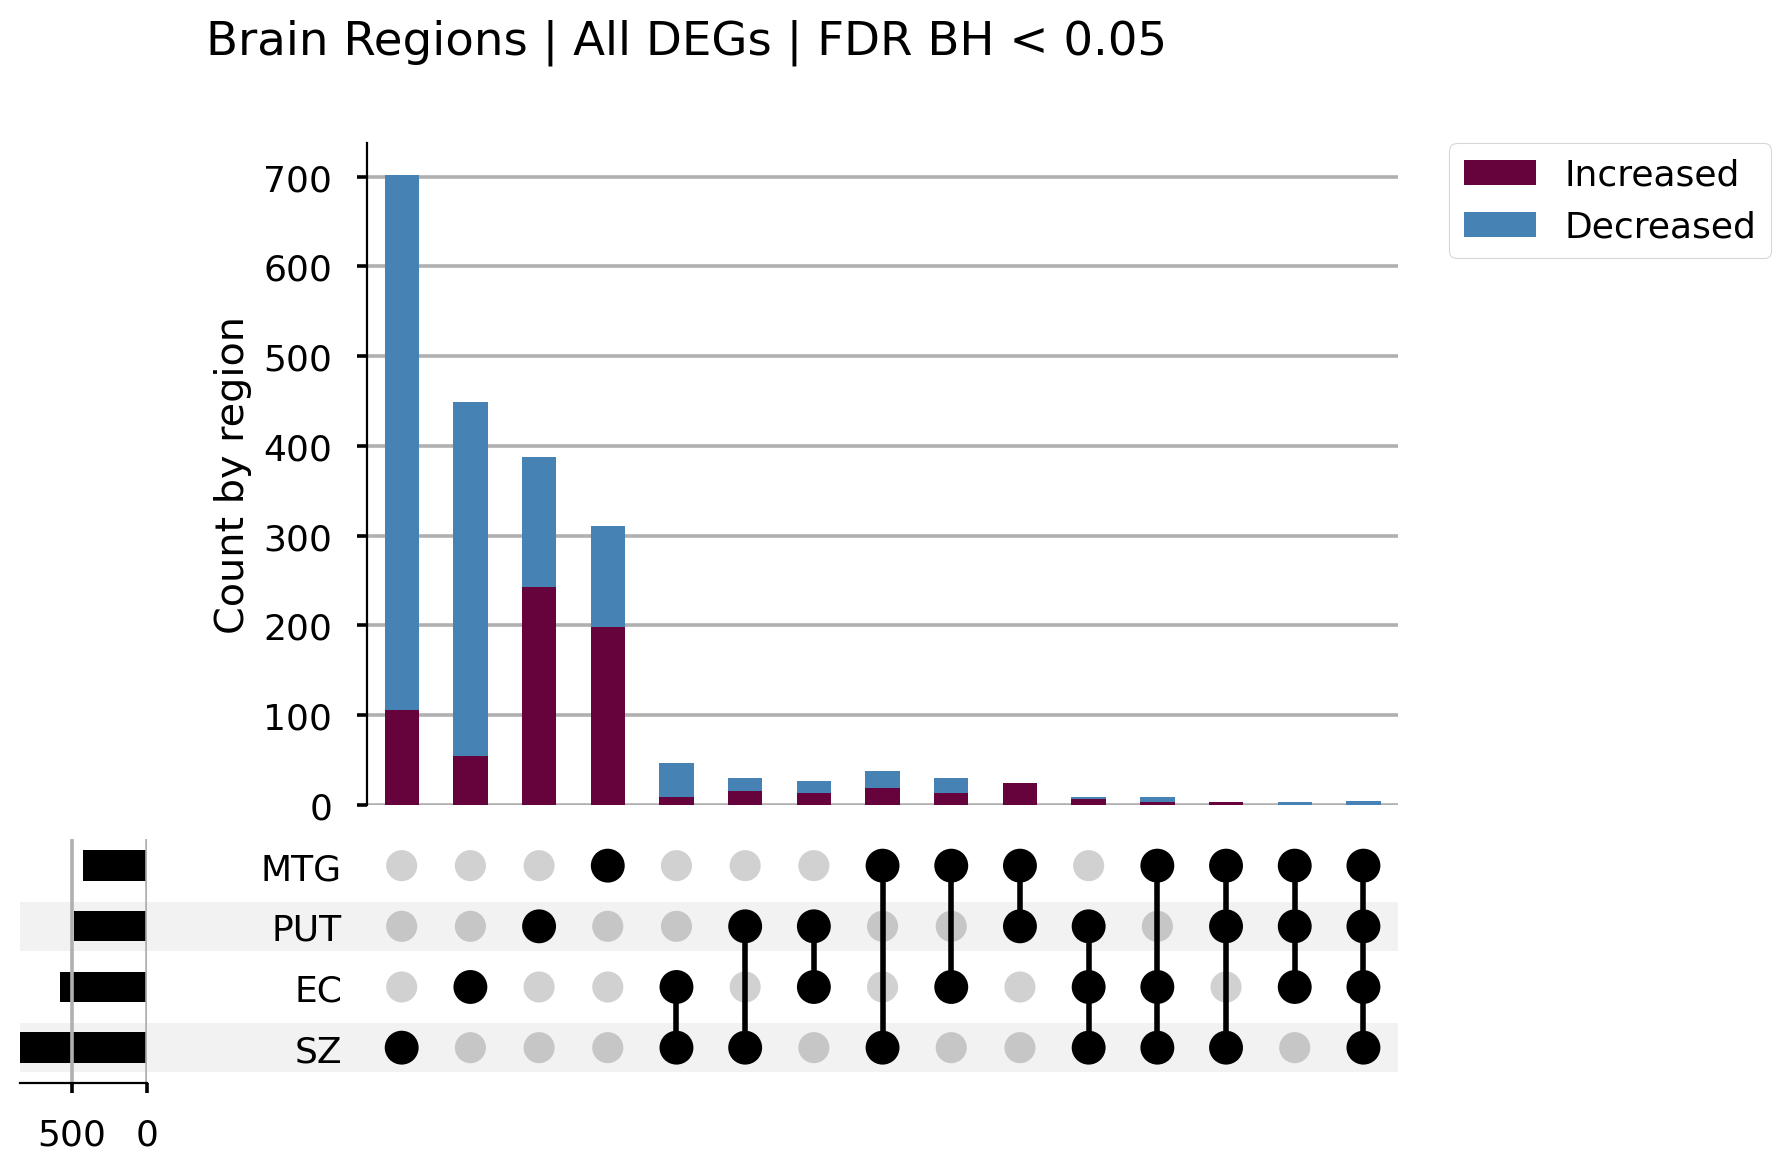

In [13]:
with rc_context({'figure.figsize': (9, 6), 'figure.dpi': 100, 'font.size': 14}):
    plt.style.use('seaborn-talk')
    this_upset = UpSet(regions_df, intersection_plot_elements=0)  # disable the default bar chart
    this_upset.add_stacked_bars(by="direction", colors=('#4682b4','#66023c'), 
                                title="Count by region", elements=10)
    this_upset.plot()
    title1 = "Brain Regions |"
    title2= " All DEGs | FDR BH < 0.05"
    plt.suptitle(title1 + title2)
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.show()

In [14]:
!date

Thu Jul 14 16:03:44 UTC 2022
